# Lab 7

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from scipy import signal
import pickle

plt.rcParams["figure.figsize"] = (15,10)


In [2]:
with open('/home/jovyan/LHC_Data/Training-Set-2/higgs_100000_pt_1000_1200.pkl', 'rb') as f:
    higgs = pickle.load(f)
with open('/home/jovyan/LHC_Data/Training-Set-2/qcd_100000_pt_1000_1200.pkl', 'rb') as f:
    qcd = pickle.load(f)

# 1. Make a stacked histogram plot for the feature variable: mass

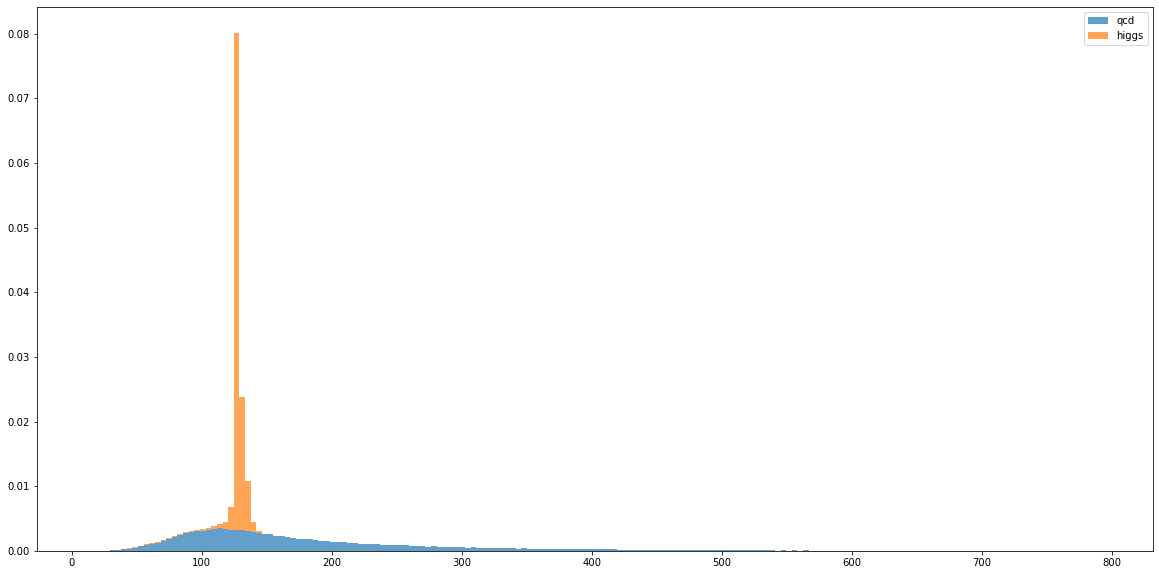

In [47]:
plt.hist([qcd['mass'],higgs['mass']],stacked=True,bins=180,density = True, label = ['qcd','higgs'],alpha=0.7);
plt.legend();

## Evaluate expected significance without any event selection.
### Use Poisson statistics for significance calculation:

In [4]:
n_qcd = 2000
n_higgs = 50
prob = stats.poisson.sf(n_qcd+n_higgs,mu=n_qcd)

In [5]:
prob

0.12961287455491954

In [6]:
f'this is a sigma value of {stats.norm.ppf(1-prob):.3f}'

'this is a sigma value of 1.128'

Compare the exact significance to the approximation  $N_{Higgs}/(√N_{QCD})$ . If they are equivalent, explain your findings.

In [7]:
n_higgs/np.sqrt(n_qcd)

1.118033988749895

These are near equivalent

# 2. Identify mass cuts to optimize the expected significance.
* Try different mass cuts systematically
* Evaluate expected significance for each set of mass cuts
* Identify the set of mass cuts which give you the highest significance.

In [8]:
np.median(higgs['mass'])

126.83836959704834

Because the qcd histogram extends left and right of the higgs histogram, I will try cuts to the left and right of certain values. The following are a number of cuts I tried in a search for the best significance I could find:

In [57]:
def make_cuts(cut):
    tot_qcd = 0
    tot_higgs = 0
    for i in range(len(higgs)):

        if cut[0] <= qcd['mass'][i] <= cut[1]:
            tot_qcd += 1

        if cut[0] <= higgs['mass'][i] <= cut[1]:
            tot_higgs += 1

    
    count_qcd = tot_qcd * n_qcd/len(qcd)
    count_higgs = tot_higgs * n_higgs/len(higgs) 
    
    prob = stats.poisson.sf(count_qcd+count_higgs,mu=count_qcd)
    sigma = stats.norm.ppf(1-prob)
    
    return count_qcd,count_higgs, sigma

In [40]:
#cuts in [min,max] mass values
cuts = [[120,140],[124,132],[124,130],[125,128],[125,129],[124,129]]

cut_data = []
for cut in cuts:
    data = make_cuts(cut)
    cut_data.append(data)

In [41]:
for i in range(len(cuts)):
    print(f'for cutting between {cuts[i][0]} and {cuts[i][1]} we have a significance of {cut_data[i][2]}')

for cutting between 120 and 140 we have a significance of 2.906548157224342
for cutting between 124 and 132 we have a significance of 3.8533187375186038
for cutting between 124 and 130 we have a significance of 3.993622369521206
for cutting between 125 and 128 we have a significance of 3.990881171379639
for cutting between 125 and 129 we have a significance of 4.020574470625383
for cutting between 124 and 129 we have a significance of 4.004006485304592


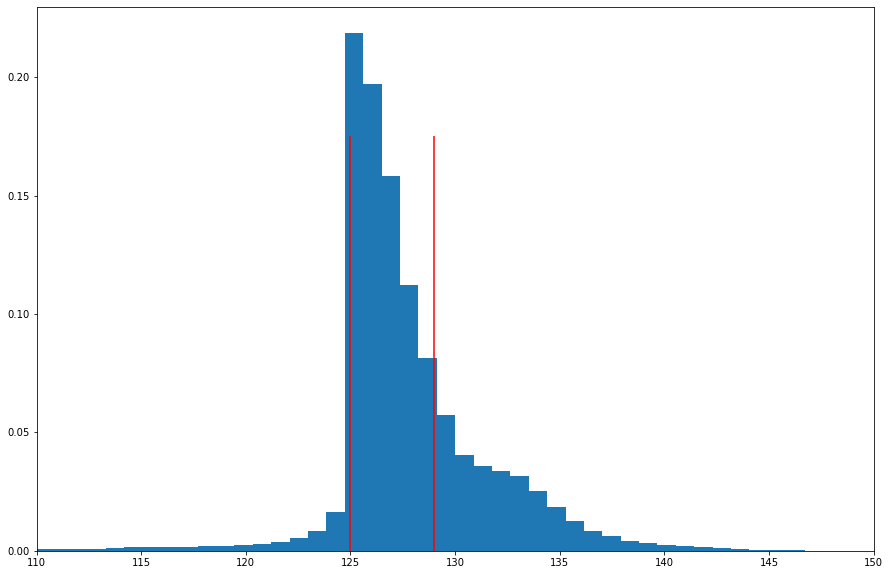

In [12]:
plt.hist(higgs['mass'],bins=150,density=True)
plt.xlim(110,150)
plt.vlines([125,129],0,0.175,colors='r');

# 3. make two sets of stacked histogram plots for the rest of the features

* Set A without any event selection
* Set B with your optimal mass cuts


In [44]:
higgs_cut = higgs.query('125<mass<129')    
higgs_cut = higgs_cut.reset_index()

qcd_cut = qcd.query('125<mass<129')
qcd_cut = qcd_cut.reset_index()


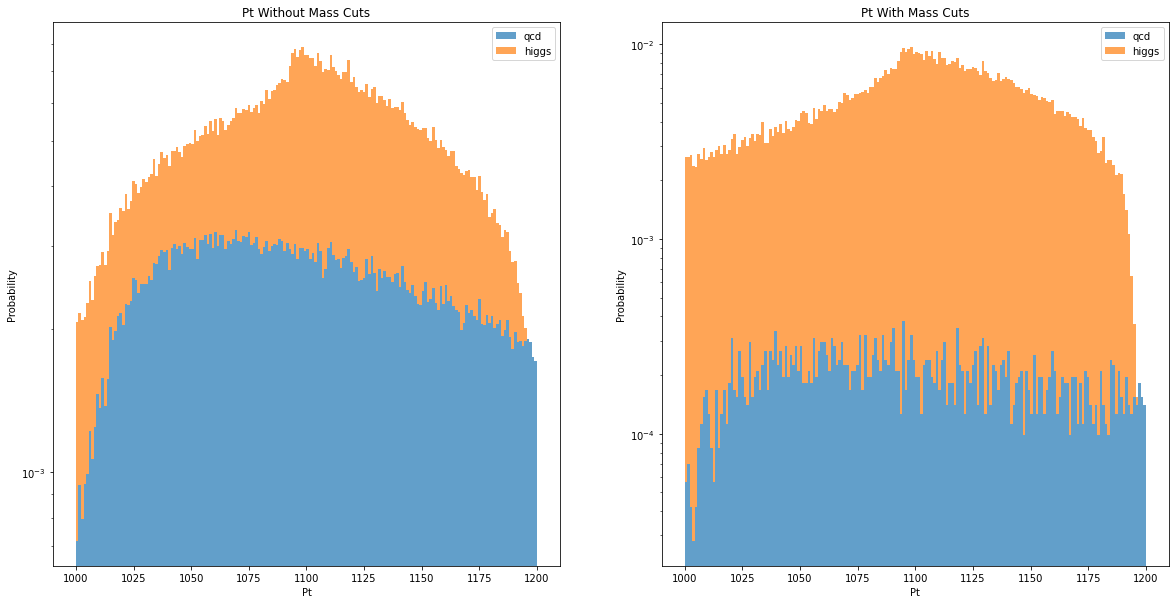

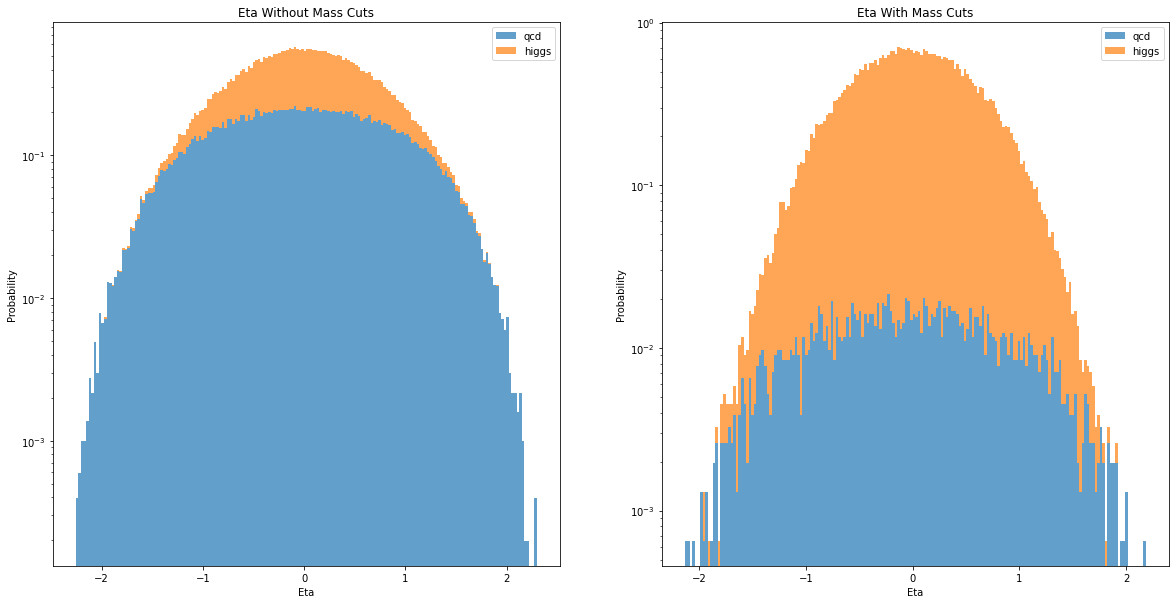

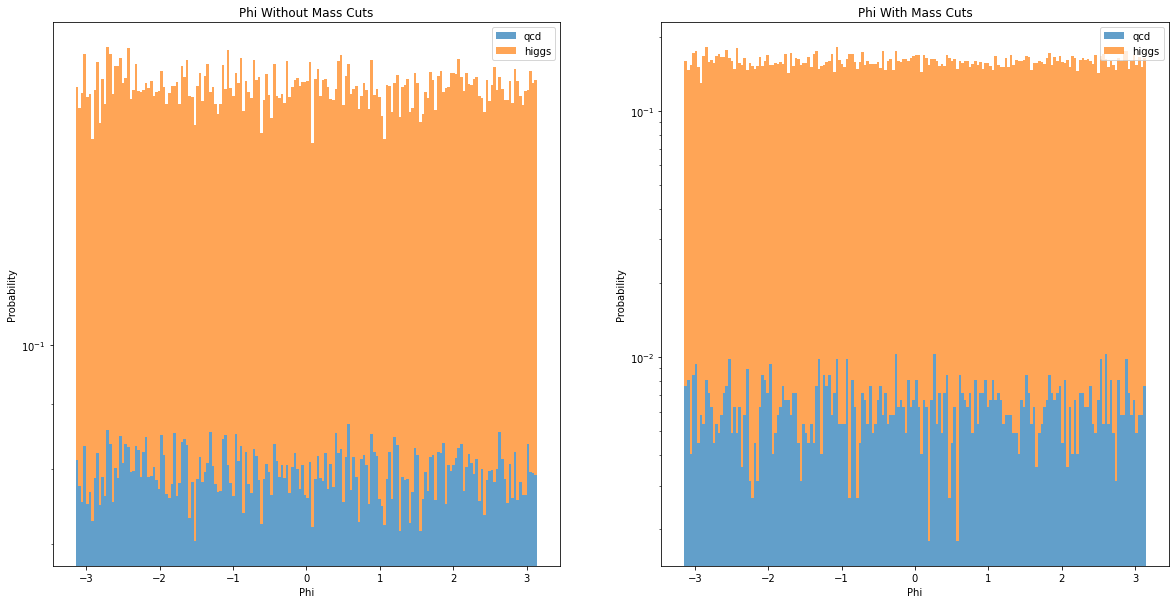

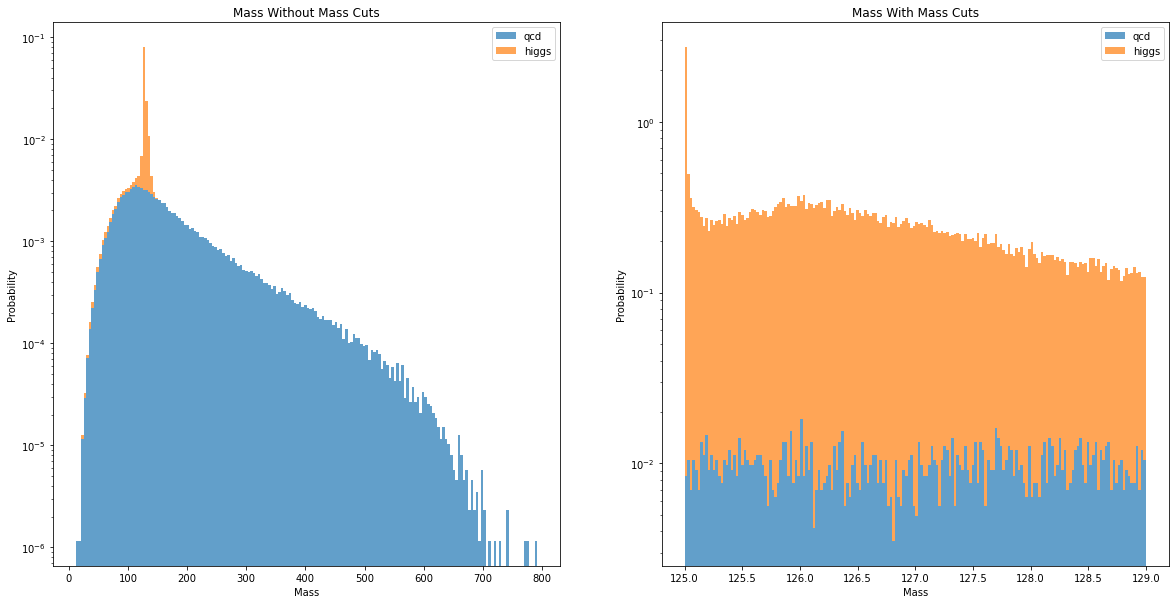

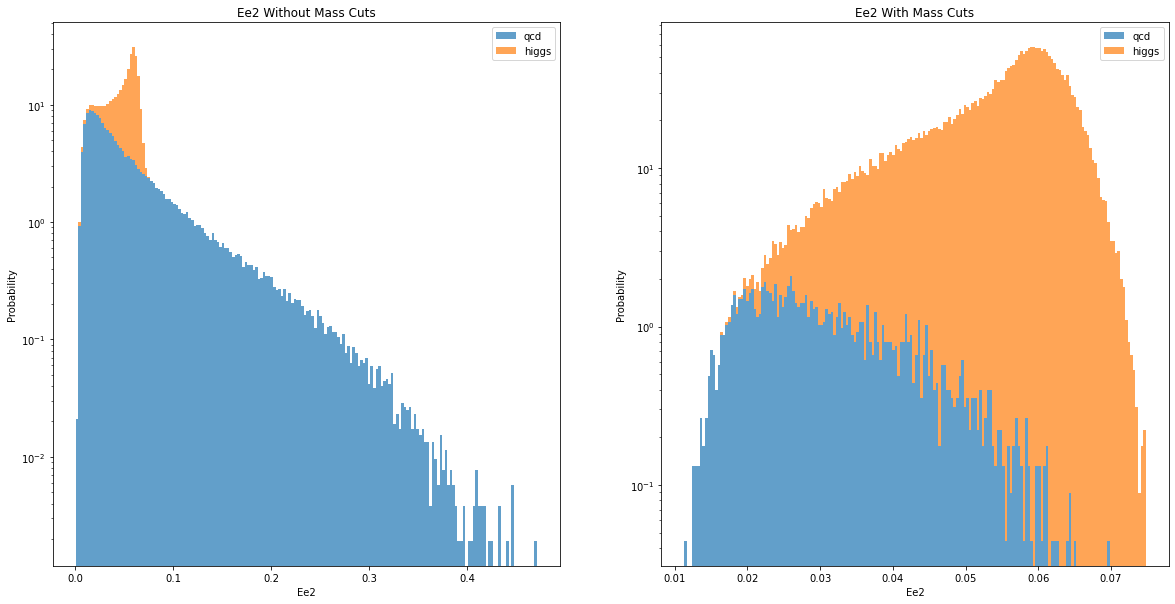

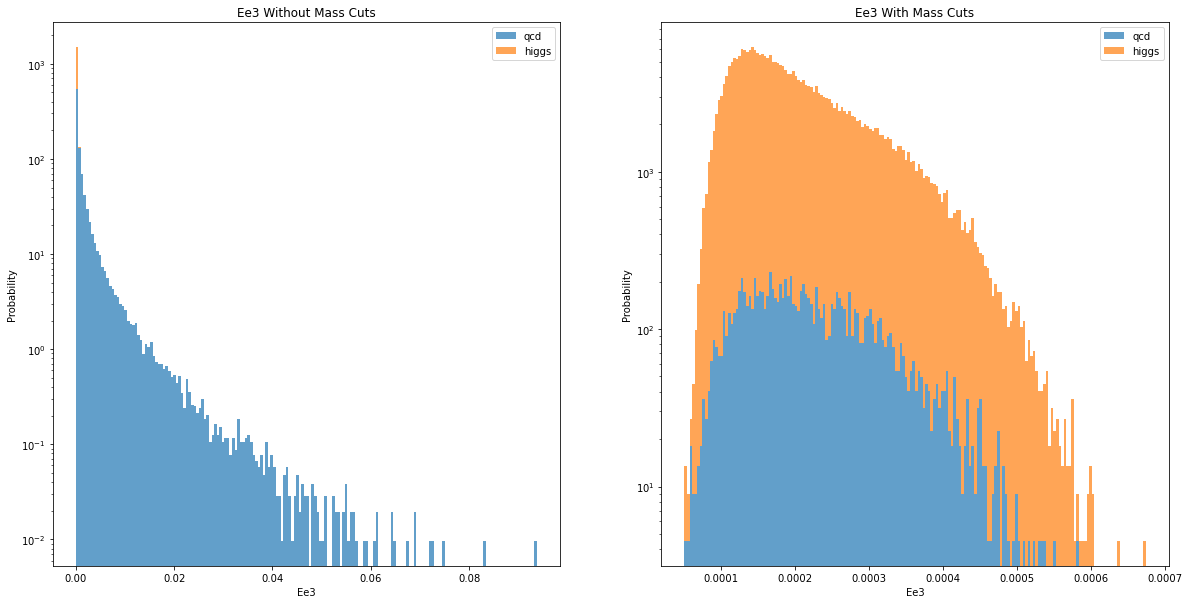

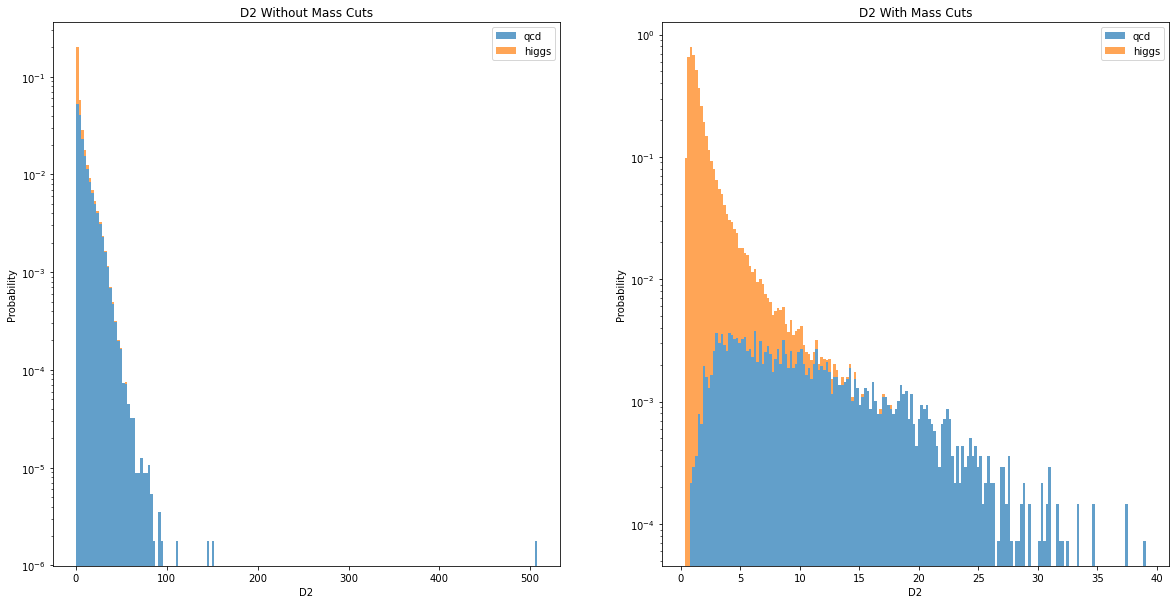

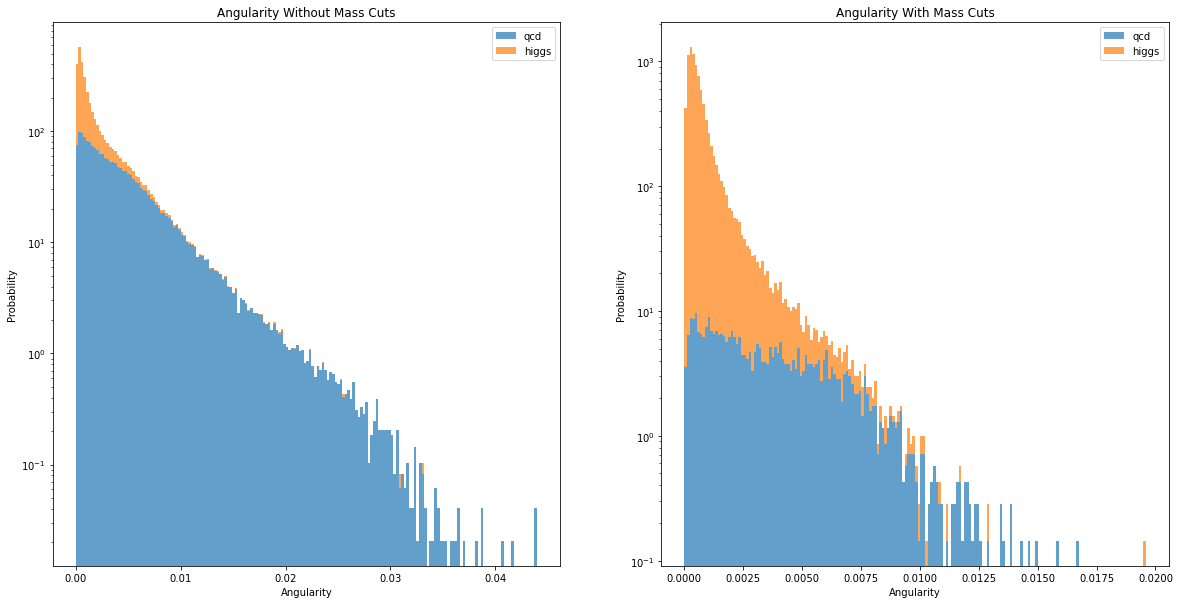

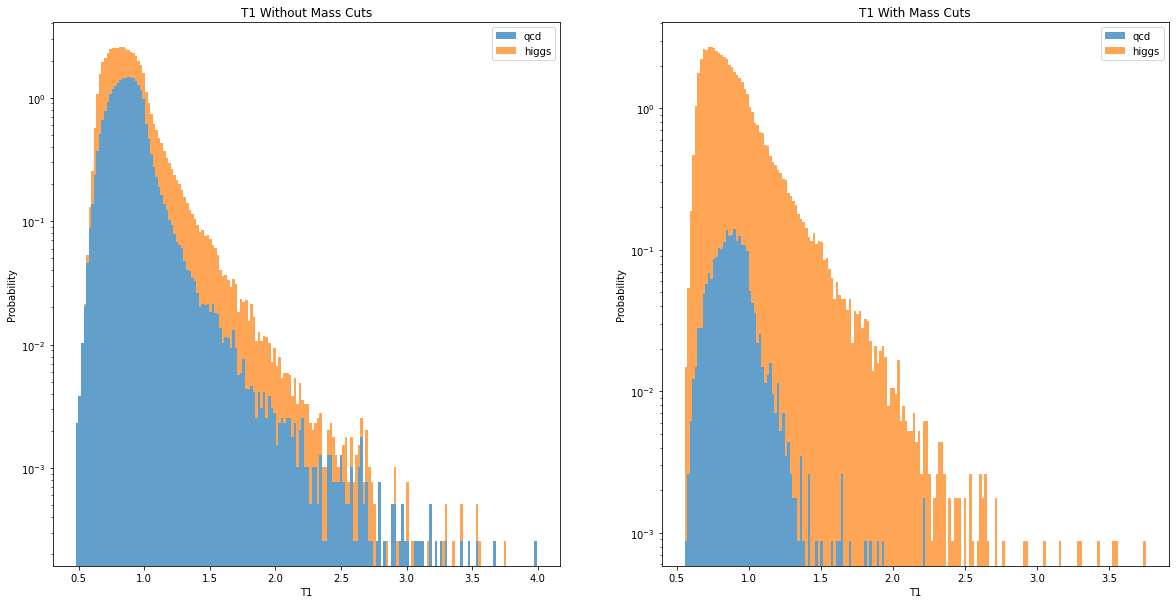

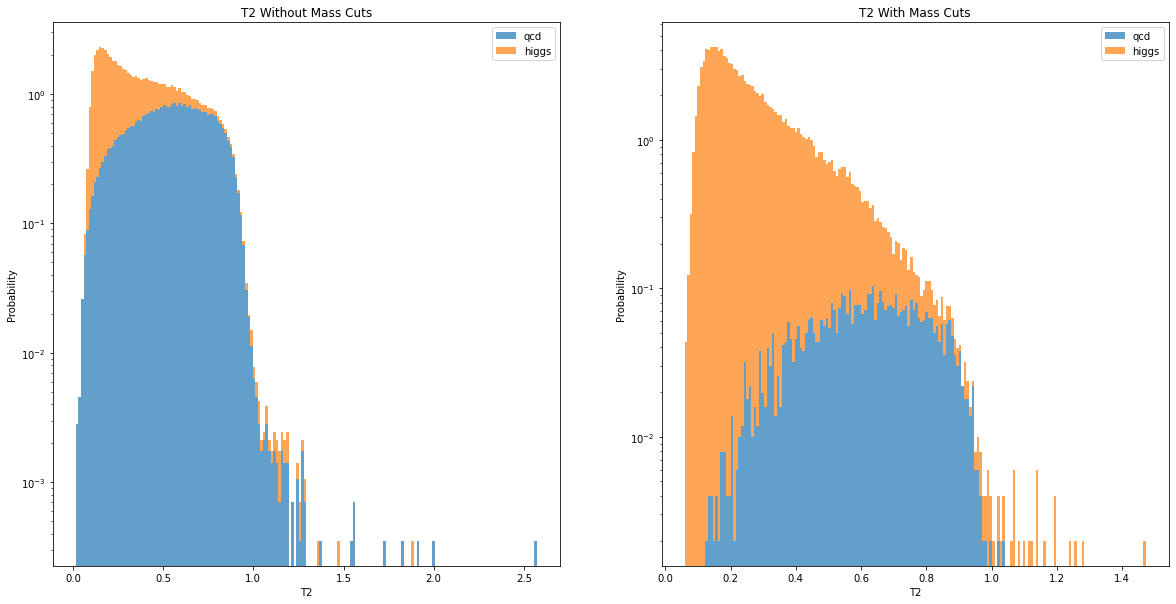

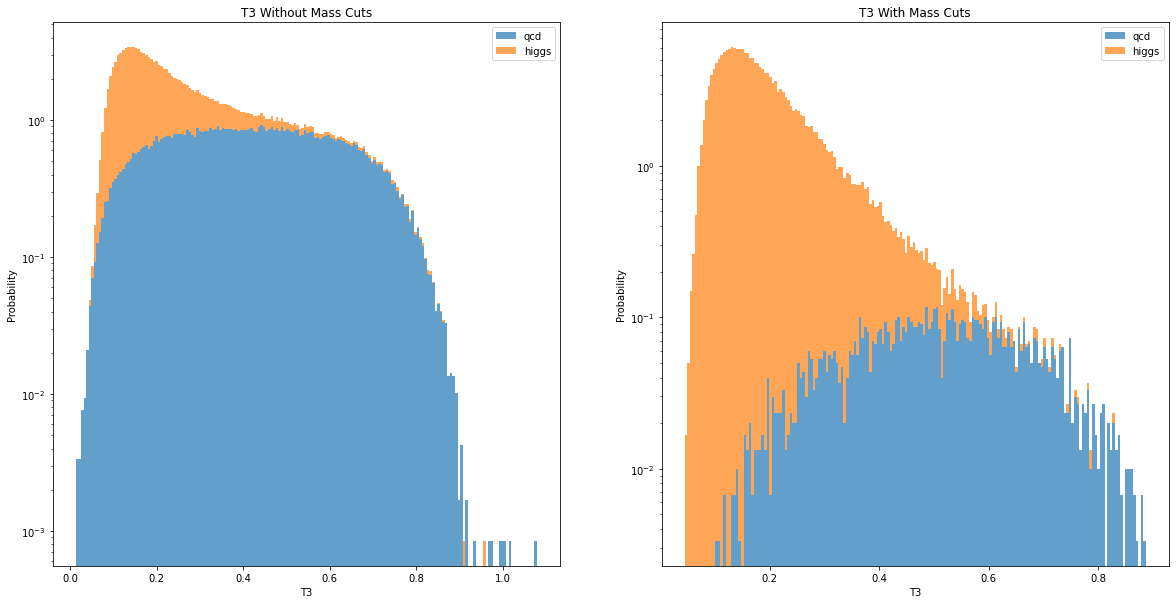

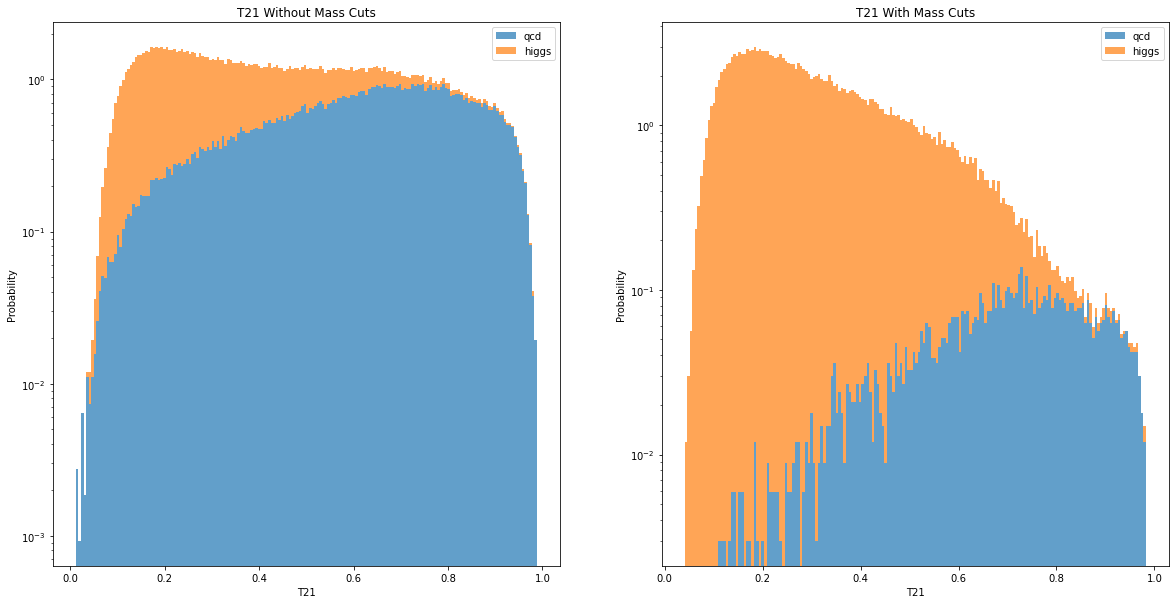

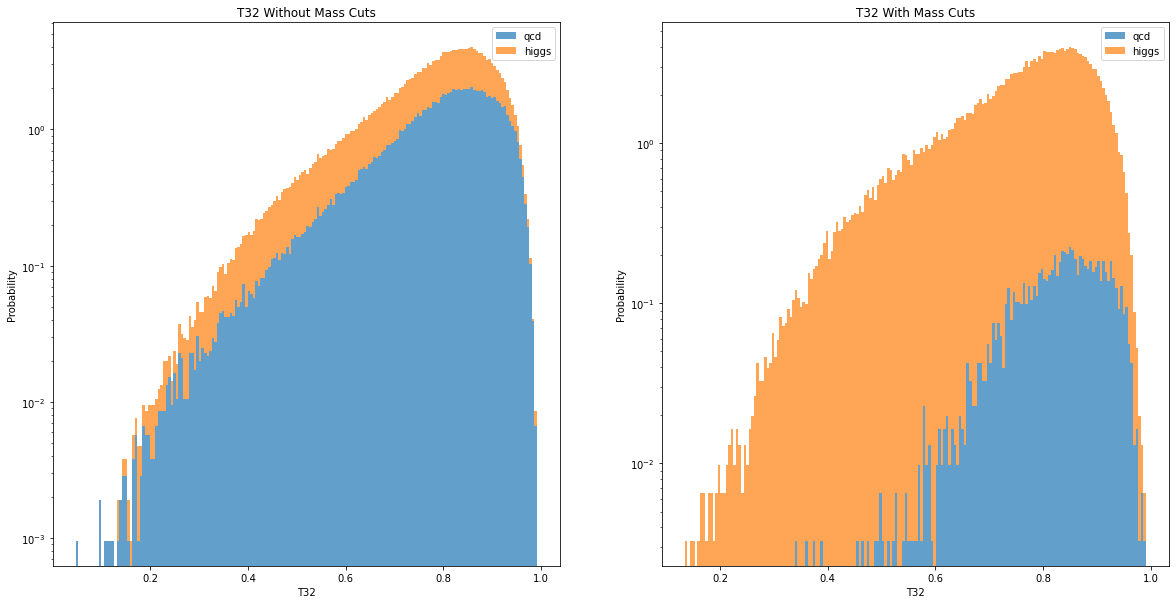

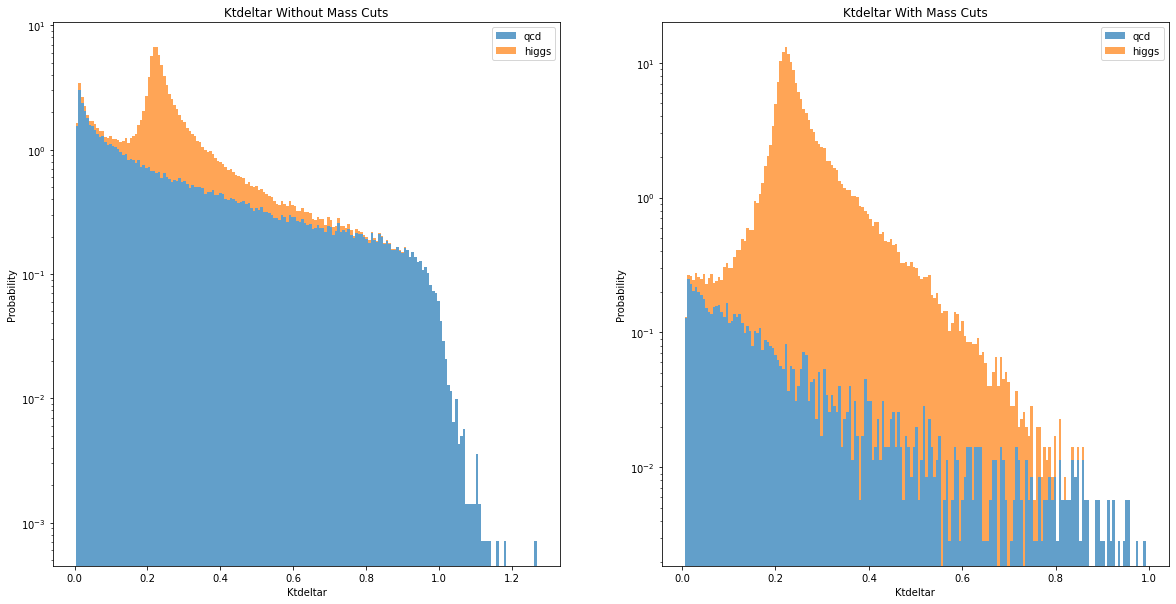

In [56]:
for key in qcd.keys():
    
    title = key.capitalize()
    
    fig, ax = plt.subplots(1,2)
    
    ax[0].hist([qcd[key],higgs[key]],stacked=True,bins=180,density = True, label = ['qcd','higgs'],alpha=0.7)
    ax[0].set_title(f'{title} Without Mass Cuts')
    
    ax[1].hist([qcd_cut[key],higgs_cut[key]],stacked=True,bins=180,density = True, label = ['qcd','higgs'],alpha=0.7)
    ax[1].set_title(f'{title} With Mass Cuts')
    
    for i in range(2):
        ax[i].set_xlabel(title)
        ax[i].set_ylabel('Probability')
        ax[i].set_yscale('log')
        ax[i].legend()

The features that appear the best to cut from are D2, T2, T3, and KtDeltaR. This is because their higgs plots are distinct from their qcd plot in the stacked plots with the mass cuts. This means that after making mass cuts, we can further distinguish between the higgs and qcd datasets using these features. For D2, T2, and T3 the peak of the higgs data is at or near 0, which is not the case with the qcd data on these features. For KtDeltaR, there is a peak in the higgs data around 0.2 in both the cut and uncut data that is not present in the qcd data, so cutting around this peak can increase our significance further. 